In [1]:
import os
import json
import pandas as pd
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
df = vycisti(df, opravy)

2023/05/24 11:03:10 z 4531 filmů odstraněno 125. Aktuální dataframe obsahuje 4406 filmů.


In [2]:
df = df.explode("Lokace")

## Explorace

<AxesSubplot:xlabel='Copyright'>

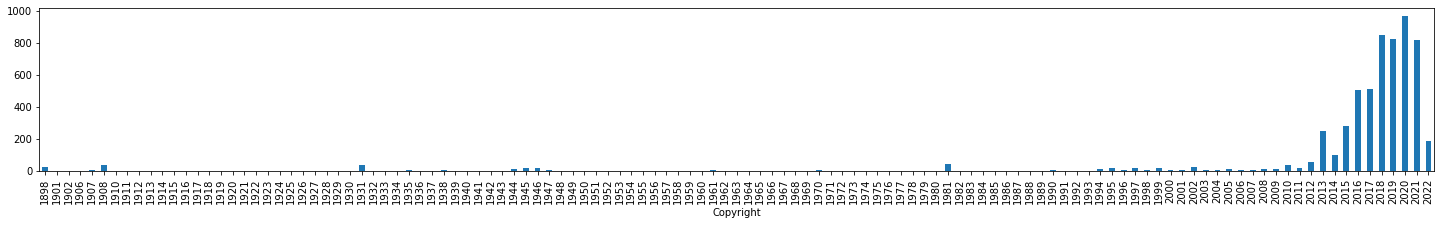

In [3]:
df.groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

<AxesSubplot:xlabel='Copyright'>

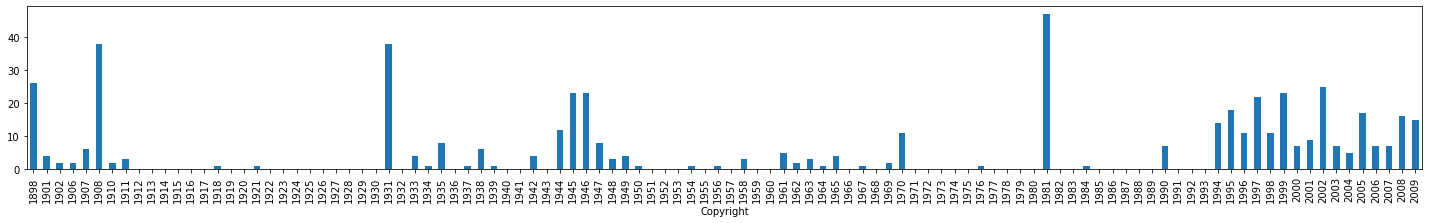

In [4]:
df[df["Copyright"] < 2010].groupby("Copyright")["Lokace"].nunique().plot.bar(figsize=(25,3))

## Čištění

In [5]:
df.groupby("Lokace")["Film"].nunique().nlargest(300).index.to_list()

['Česká republika, Praha (Česká republika)',
 'Nové Město (Praha)',
 'Staré Město (Praha)',
 'Malá Strana (Praha)',
 'Vltava (Praha)',
 'Hradčany (Praha)',
 'Praha (Česká republika)',
 'Holešovice (Praha)',
 'Vinohrady (Praha)',
 'Žižkov (Praha)',
 'Dejvice (Praha)',
 'Smíchov (Praha)',
 'Staroměstské náměstí (Staré Město)',
 'Bubeneč (Praha)',
 'Slovensko, Bratislava (Slovensko)',
 'Václavské náměstí (Nové Město)',
 'Karlín (Praha)',
 'Nusle (Praha)',
 'Národní třída (Nové Město)',
 'Josefov (Praha)',
 'Praha',
 'Pražský hrad (Hradčany)',
 'Ruzyně (Praha)',
 'Výstaviště (Bubeneč)',
 'Letná (Praha)',
 'Podolí (Praha)',
 'Praha, Nové Město (Praha)',
 'Praha, Vltava (Praha)',
 'Brno (Česká republika)',
 'Karlův most (Vltava)',
 'Libeň (Praha)',
 'Praha, Bubeneč (Praha)',
 'Vršovice (Praha)',
 'bez exteriérů',
 'Vodičkova ulice (Nové Město)',
 'most Legií (Vltava)',
 'náměstí Jana Palacha (Josefov)',
 'Francie, Paříž (Francie)',
 'Malostranské náměstí (Malá Strana)',
 'Praha, Hradčany (Pr

In [6]:
def mesto(lokace):
    
    if isinstance(lokace, str):
    
        if "(" in lokace:

            zavorka = lokace.split("(")[1].replace(")","").strip()

            if zavorka in seznamy["praha"]:

                mesto = "Praha"

            elif zavorka == "Česká republika":
                
                mesto = lokace.split("(")[0].strip()
            
            else:

                mesto = zavorka

        else:
            
            mesto = lokace
            
        if "Česká republika, " in mesto:
                
            mesto = mesto.split(",")[1].strip()
            
    else:

        mesto = lokace         
        
    return(mesto)

In [7]:
mesto("Celetná ulice (Staré Město)")

'Praha'

In [8]:
df["Město"] = df["Lokace"].apply(lambda x: mesto(x))

In [9]:
df["Město"]

0             Praha
0             Praha
1             Praha
1             Praha
1       ulice Újezd
           ...     
4530          Úštěk
4530         Kanada
4530       Montreal
4530       Montreal
4530       Montreal
Name: Město, Length: 10603, dtype: object

In [10]:
df[df["Lokace"].str.contains("Česká republika, ",na=True)]["Lokace"]

41                                             NaN
42                                             NaN
43                                             NaN
45                                             NaN
46                                             NaN
                           ...                    
4520      Česká republika, Praha (Česká republika)
4522      Česká republika, Praha (Česká republika)
4523    Česká republika, Příbram (Česká republika)
4528      Česká republika, Praha (Česká republika)
4530      Česká republika, Praha (Česká republika)
Name: Lokace, Length: 3946, dtype: object

In [11]:
", ".join(df.groupby("Město")["Film"].nunique().nlargest(1000).index.to_list())

'Praha, Slovensko, Brno, Francie, Německo, Itálie, Polsko, Rakousko, Spojené státy americké, Bratislava, USA, bez exteriérů, Velká Británie, Liberec, Ostrava, Ústí nad Labem, Plzeň, Zlín, Jaroměř, Hradec Králové, New York, Olomouc, Paříž, Doksy, Jizerské hory, Kladno, Nizozemsko, Rusko, Výstaviště, Beroun, Kalifornie, Karlovy Vary, Krkonoše, Lucerna, Mikulov, Mladá Boleslav, Praha a okolí, Slapy, Ukrajina, České Budějovice, Španělsko, Šumava, Brdy, Jihlava, Kolín, Maďarsko, Michle, Mělník, New York City, Norsko, Náchod, Nádražní ulice, Pardubice, Příbram, Stodůlky, Veltrusy, Vysočany, Švýcarsko, Broumov, Japonsko, Kouřim, Letňany, Loretánské náměstí, Lysá nad Labem, Masarykovo náměstí, Motol, Palackého náměstí, Petřín, Poděbrady, Prostějov, Přerov nad Labem, Radotín, Spálená ulice, Staroměstská radnice, Sušice, Varnsdorf, Vinohradská třída, Vysoké Tatry, Český ráj, Čína, Špindlerův Mlýn, Štefánikova ulice, Austrálie, Bartolomějská ulice, Bechyně, Connecticut, Dunaj, Děčín, Finsko, Hart

## Tak co teď?

In [12]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf = hcf[hcf["Copyright"] >= 1999]

In [13]:
hcf["Film"].nunique()

566

In [14]:
hcf.groupby("Město")["Film"].nunique().nlargest(50)

Město
Praha                          159
Slovensko                       51
Brno                            10
Jaroměř                          9
Rakousko                         8
Bratislava                       7
Zlín                             7
Beroun                           6
Hradec Králové                   6
Itálie                           6
Kladno                           6
Liberec                          6
Mladá Boleslav                   6
Polsko                           6
Praha a okolí                    6
Francie                          5
Německo                          5
Olomouc                          5
Ostrava                          5
Plzeň                            5
Ústí nad Labem                   5
Brdy                             4
Doksy                            4
Jizerské hory                    4
Karlovy Vary                     4
Kouřim                           4
Mikulov                          4
Mělník                           4
Nádražní ulice

In [15]:
hcf.groupby("Město")["Film"].nunique().nlargest(10)

Město
Praha             159
Slovensko          51
Brno               10
Jaroměř             9
Rakousko            8
Bratislava          7
Zlín                7
Beroun              6
Hradec Králové      6
Itálie              6
Name: Film, dtype: int64

In [16]:
df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

C:\Users\micha\AppData\Local\Temp\ipykernel_4692\3879034159.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Lokace"].str.lower().str.contains("(česká republika)", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)


Lokace
Česká republika, Praha (Česká republika)    98
Praha (Česká republika)                     35
Brno (Česká republika)                      14
Česká republika, Brno (Česká republika)      9
Ostrava (Česká republika)                    7
Plzeň (Česká republika)                      6
Jaroměř (Česká republika)                    5
Kolín (Česká republika)                      5
Veltrusy (Česká republika)                   5
Doksy (Česká republika)                      4
Hradec Králové (Česká republika)             4
Jihlava (Česká republika)                    4
Olomouc (Česká republika)                    4
Slapy (Česká republika)                      4
Zlín (Česká republika)                       4
Ústí nad Labem (Česká republika)             4
Beroun (Česká republika)                     3
Brdy (Česká republika)                       3
Broumov (Česká republika)                    3
Jizerské hory (Česká republika)              3
Krkonoše (Česká republika)                   3
Lysá n

In [17]:
df[(df["Město"] != "Praha") & (df["Lokace"].str.lower().str.contains("ulice", na=False))].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Mladá Boleslav, Viničná ulice (Mladá Boleslav)                                      3
Denisova ulice (Olomouc)                                                            2
Hněvotínská ulice (Olomouc)                                                         2
Kamýcká ulice (Suchdol)                                                             2
Kounicova ulice (Brno)                                                              2
Křížkovského ulice (Olomouc)                                                        2
Linecká ulice (Český Krumlov)                                                       2
Mýtna ulice (Bratislava)                                                            2
Olomouc, ulice (Olomouc)                                                            2
Pribinova ulice (Bratislava)                                                        2
Sanatorium sv. Anny /interiér/ (Luční ulice)                                        2
Viničná ulice (Mladá Boleslav)                 

In [18]:
df[df["Lokace"].str.lower().str.contains("ulice", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Vodičkova ulice (Nové Město)                                  12
Pernerova ulice (Karlín)                                       9
Praha, ulice (Praha)                                           7
Bělohorská ulice (Břevnov)                                     6
Lucerna (Vodičkova ulice)                                      6
Vinohradská ulice (Vinohrady)                                  6
ulice Komunardů (Holešovice)                                   6
Dejvická ulice (Dejvice)                                       5
Koulova ulice (Dejvice)                                        5
Nádražní ulice (Smíchov)                                       5
Pařížská ulice (Staré Město)                                   5
Sněmovní ulice (Malá Strana)                                   5
Spálená ulice (Nové Město)                                     5
ulice Na Pankráci (Nusle)                                      5
Bartolomějská ulice (Staré Město)                              4
Hellichova ulice (

In [19]:
df[df["Lokace"].str.lower().str.contains("zámek", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Mostecko, zámek Jezeří                                                                                                                                                       2
zámek /skleníky/ (Veltrusy)                                                                                                                                                  2
Benešovsko, Martinice u Dolních Kralovic, zámek Martinice (Martinice u Dolních Kralovic)                                                                                     1
Bobnice, Poděbrady, zámek (Poděbrady)                                                                                                                                        1
Egyptský pavilon (zámek Veltrusy)                                                                                                                                            1
Hostýnské vrchy, Panská skála (Varahany) u Kamenického Šenova, Zlatý vrch u České Kamenice, tvrz Cuknštejn, Roudnice n

In [20]:
df[df["Lokace"].str.lower().str.contains("náměstí", na=False)].groupby("Lokace")["Film"].nunique().nlargest(50)

Lokace
Staroměstské náměstí (Staré Město)                                            25
Václavské náměstí (Nové Město)                                                22
náměstí Jana Palacha (Josefov)                                                12
Malostranské náměstí (Malá Strana)                                            11
Hradčanské náměstí (Hradčany)                                                  9
Národní muzeum (Václavské náměstí)                                             7
náměstí Republiky (Staré Město)                                                7
Václavské náměstí (Praha)                                                      6
Staroměstská radnice (Staroměstské náměstí)                                    5
náměstí Curieových (Staré Město)                                               5
náměstí Svobody (Bubeneč)                                                      5
Karlovo náměstí (Nové Město)                                                   4
Loretánské náměstí (H